# 08 분류 실습 - 캐글 산탄데르 고객 만족 예측 
산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것   
산탄데르 은행이 캐글에 경연을 의뢰한 데이터이며 피처 이름은 모두 익명 처리되어 어떤 속성인지 알 수 없다  
클래스 레이블 명은 TARGET이며, 이 값이 1이면 불만을 가진 고객, 0이면 만족한고객이다.  
모델의 성능 평가는 ROC_AUC(ROC 곡선 영역)로 평가한다.  

**데이터 전처리**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./data/train_santander.csv')
print('dataset shape :', cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


클래스 값 칼럼을 포함한 피처가 371개 존재합니다.

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


모든 데이터가 숫자형이며 Null값은 없다.  
이제 전체 데이터에서 만족과 불만족의 비율을 살펴보고 TARGET 속성 값의 분포를 알아보면 간단할 것이다.

In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0: .2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은  0.04


76020개의 데이터에서 3008개의 데이터만이 불만족임을 나타내고 있다.  
이는 전체 데이터 비율에서 4% 밖에 되지않는 수치다.

In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


DataFrame의 describe() 메서드를 이용해 각 데이터의 값 분포를 살펴보면  
 var3의 min 값이 -999999인것을 확인할 수 있다.  
 이는 NaN 값이나 특정 예외 값을 -999999로 변환했을 것   
 var3은 숫자 형이고, 다른 값에 비하면 -999999는 편차가 심하니까  2로 변환한다.  
 ID 피처는 단순 식별자이니까 삭제해도 상관없을듯하며   
 위 데이터 세트를 클래스 데이터 세트와 피처 데이터 세트로 분리한다.    

In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


학습과 성능 평가를 위해 원 데이터 세트에서 학습 데이터와 테스트 데이터를 분리한다.  
비대칭 데이터 세트이니 Target 값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출되었는지 확인해보면 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.2, random_state = 0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


두 데이터 세트 모두 원본과 같이 1 값이 4% 정도인것을 확인할 수 있다.

**XGBoost 모델 학습과 하이퍼 파라미터 튜닝**  
XGBoost의 학습모델을 생성하고 예측 결과를 ROC AUC로 평가해 본다.  
n_estimators는 500으로 하되 early_stopping은 100으로 설정한다.  
평가 데이터는 앞에서 분리한 데이터 세트를 이용하고  
eval_set = [(X_train, y_train),(X_test,y_test)]로 설정한다

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric='auc', eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.880

테스트 데이터 세트로 예측 시 ROC AUC는 약 0.8419로 나온다  

이제 XGBoost의 하이퍼 파라미터 튜닝을 수행한다.  
수동으로 하나하나 바꿔가며 돌려볼 수도 있지만 매우 귀찮고 시간적으로도 상당한 낭비이다.  
칼럼의 개수가 많으므로 과적합 가능성을 가정하고, max_depth, min_child_weight, colsample_bytree  
위 3개의 하이퍼 파라미터만 튜닝 대상으로 해보겠다.  



In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5, 7], 'min_child_weight':[1, 3],'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85719	validation_1-auc:0.83696
[15]	validation_0-auc:0.8584

[43]	validation_0-auc:0.87525	validation_1-auc:0.84022
[44]	validation_0-auc:0.87595	validation_1-auc:0.83967
[45]	validation_0-auc:0.87630	validation_1-auc:0.84004
[46]	validation_0-auc:0.87700	validation_1-auc:0.83966
[47]	validation_0-auc:0.87743	validation_1-auc:0.83963
[48]	validation_0-auc:0.87770	validation_1-auc:0.83931
[49]	validation_0-auc:0.87782	validation_1-auc:0.83925
[50]	validation_0-auc:0.87827	validation_1-auc:0.83935
[51]	validation_0-auc:0.87862	validation_1-auc:0.83920
[52]	validation_0-auc:0.87951	validation_1-auc:0.83895
[53]	validation_0-auc:0.88027	validation_1-auc:0.83876
[54]	validation_0-auc:0.88118	validation_1-auc:0.83840
[55]	validation_0-auc:0.88128	validation_1-auc:0.83834
[56]	validation_0-auc:0.88146	validation_1-auc:0.83873
[57]	validation_0-auc:0.88158	validation_1-auc:0.83860
[58]	validation_0-auc:0.88183	validation_1-auc:0.83810
[59]	validation_0-auc:0.88192	validation_1-auc:0.83774
[60]	validation_0-auc:0.88215	validation_1-auc:0.83723
Stopping. 

[24]	validation_0-auc:0.86453	validation_1-auc:0.84460
[25]	validation_0-auc:0.86537	validation_1-auc:0.84480
[26]	validation_0-auc:0.86586	validation_1-auc:0.84441
[27]	validation_0-auc:0.86656	validation_1-auc:0.84401
[28]	validation_0-auc:0.86698	validation_1-auc:0.84422
[29]	validation_0-auc:0.86770	validation_1-auc:0.84385
[30]	validation_0-auc:0.86778	validation_1-auc:0.84407
[31]	validation_0-auc:0.86804	validation_1-auc:0.84395
[32]	validation_0-auc:0.86828	validation_1-auc:0.84381
[33]	validation_0-auc:0.86865	validation_1-auc:0.84417
[34]	validation_0-auc:0.86902	validation_1-auc:0.84385
[35]	validation_0-auc:0.86959	validation_1-auc:0.84369
[36]	validation_0-auc:0.87019	validation_1-auc:0.84297
[37]	validation_0-auc:0.87050	validation_1-auc:0.84278
[38]	validation_0-auc:0.87180	validation_1-auc:0.84286
[39]	validation_0-auc:0.87270	validation_1-auc:0.84224
[40]	validation_0-auc:0.87288	validation_1-auc:0.84197
[41]	validation_0-auc:0.87293	validation_1-auc:0.84175
[42]	valid

[22]	validation_0-auc:0.88633	validation_1-auc:0.83706
[23]	validation_0-auc:0.88770	validation_1-auc:0.83714
[24]	validation_0-auc:0.88866	validation_1-auc:0.83742
[25]	validation_0-auc:0.88907	validation_1-auc:0.83753
[26]	validation_0-auc:0.89067	validation_1-auc:0.83634
[27]	validation_0-auc:0.89161	validation_1-auc:0.83565
[28]	validation_0-auc:0.89214	validation_1-auc:0.83460
[29]	validation_0-auc:0.89341	validation_1-auc:0.83413
[30]	validation_0-auc:0.89378	validation_1-auc:0.83373
[31]	validation_0-auc:0.89393	validation_1-auc:0.83396
[32]	validation_0-auc:0.89409	validation_1-auc:0.83435
[33]	validation_0-auc:0.89414	validation_1-auc:0.83412
[34]	validation_0-auc:0.89433	validation_1-auc:0.83386
[35]	validation_0-auc:0.89511	validation_1-auc:0.83338
[36]	validation_0-auc:0.89554	validation_1-auc:0.83232
[37]	validation_0-auc:0.89588	validation_1-auc:0.83223
[38]	validation_0-auc:0.89608	validation_1-auc:0.83222
[39]	validation_0-auc:0.89640	validation_1-auc:0.83187
[40]	valid

[30]	validation_0-auc:0.88457	validation_1-auc:0.84080
[31]	validation_0-auc:0.88542	validation_1-auc:0.84070
[32]	validation_0-auc:0.88561	validation_1-auc:0.84055
[33]	validation_0-auc:0.88609	validation_1-auc:0.84024
[34]	validation_0-auc:0.88632	validation_1-auc:0.83977
[35]	validation_0-auc:0.88638	validation_1-auc:0.83959
[36]	validation_0-auc:0.88644	validation_1-auc:0.83935
[37]	validation_0-auc:0.88730	validation_1-auc:0.83898
[38]	validation_0-auc:0.88803	validation_1-auc:0.83814
[39]	validation_0-auc:0.88817	validation_1-auc:0.83806
[40]	validation_0-auc:0.88815	validation_1-auc:0.83811
[41]	validation_0-auc:0.88838	validation_1-auc:0.83807
[42]	validation_0-auc:0.88881	validation_1-auc:0.83753
[43]	validation_0-auc:0.88902	validation_1-auc:0.83781
[44]	validation_0-auc:0.88912	validation_1-auc:0.83779
Stopping. Best iteration:
[14]	validation_0-auc:0.87102	validation_1-auc:0.84520

[0]	validation_0-auc:0.81007	validation_1-auc:0.80693
Multiple eval metrics have been passed:

[31]	validation_0-auc:0.87189	validation_1-auc:0.84252
[32]	validation_0-auc:0.87276	validation_1-auc:0.84147
[33]	validation_0-auc:0.87303	validation_1-auc:0.84149
[34]	validation_0-auc:0.87350	validation_1-auc:0.84118
[35]	validation_0-auc:0.87370	validation_1-auc:0.84115
[36]	validation_0-auc:0.87408	validation_1-auc:0.84113
[37]	validation_0-auc:0.87477	validation_1-auc:0.84038
[38]	validation_0-auc:0.87530	validation_1-auc:0.84009
[39]	validation_0-auc:0.87541	validation_1-auc:0.83988
[40]	validation_0-auc:0.87556	validation_1-auc:0.83984
[41]	validation_0-auc:0.87580	validation_1-auc:0.83991
[42]	validation_0-auc:0.87631	validation_1-auc:0.83942
[43]	validation_0-auc:0.87667	validation_1-auc:0.83926
[44]	validation_0-auc:0.87715	validation_1-auc:0.83916
[45]	validation_0-auc:0.87765	validation_1-auc:0.83868
Stopping. Best iteration:
[15]	validation_0-auc:0.85990	validation_1-auc:0.84361

[0]	validation_0-auc:0.81105	validation_1-auc:0.80637
Multiple eval metrics have been passed:

[24]	validation_0-auc:0.86688	validation_1-auc:0.84082
[25]	validation_0-auc:0.86778	validation_1-auc:0.84074
[26]	validation_0-auc:0.86849	validation_1-auc:0.84076
[27]	validation_0-auc:0.86909	validation_1-auc:0.84096
[28]	validation_0-auc:0.86930	validation_1-auc:0.84113
[29]	validation_0-auc:0.86973	validation_1-auc:0.84187
[30]	validation_0-auc:0.87070	validation_1-auc:0.84167
[31]	validation_0-auc:0.87108	validation_1-auc:0.84174
[32]	validation_0-auc:0.87124	validation_1-auc:0.84166
[33]	validation_0-auc:0.87154	validation_1-auc:0.84142
[34]	validation_0-auc:0.87216	validation_1-auc:0.84153
[35]	validation_0-auc:0.87288	validation_1-auc:0.84147
[36]	validation_0-auc:0.87324	validation_1-auc:0.84136
[37]	validation_0-auc:0.87343	validation_1-auc:0.84116
[38]	validation_0-auc:0.87351	validation_1-auc:0.84114
[39]	validation_0-auc:0.87406	validation_1-auc:0.84087
[40]	validation_0-auc:0.87415	validation_1-auc:0.84088
[41]	validation_0-auc:0.87540	validation_1-auc:0.84065
[42]	valid

[26]	validation_0-auc:0.89397	validation_1-auc:0.83459
[27]	validation_0-auc:0.89434	validation_1-auc:0.83497
[28]	validation_0-auc:0.89490	validation_1-auc:0.83437
[29]	validation_0-auc:0.89493	validation_1-auc:0.83446
[30]	validation_0-auc:0.89559	validation_1-auc:0.83426
[31]	validation_0-auc:0.89565	validation_1-auc:0.83405
[32]	validation_0-auc:0.89653	validation_1-auc:0.83320
[33]	validation_0-auc:0.89680	validation_1-auc:0.83358
[34]	validation_0-auc:0.89762	validation_1-auc:0.83320
[35]	validation_0-auc:0.89782	validation_1-auc:0.83337
[36]	validation_0-auc:0.89811	validation_1-auc:0.83330
[37]	validation_0-auc:0.89813	validation_1-auc:0.83297
[38]	validation_0-auc:0.89838	validation_1-auc:0.83265
[39]	validation_0-auc:0.89870	validation_1-auc:0.83239
[40]	validation_0-auc:0.89877	validation_1-auc:0.83215
[41]	validation_0-auc:0.89897	validation_1-auc:0.83207
[42]	validation_0-auc:0.89904	validation_1-auc:0.83192
[43]	validation_0-auc:0.89918	validation_1-auc:0.83183
[44]	valid

[32]	validation_0-auc:0.88796	validation_1-auc:0.83611
[33]	validation_0-auc:0.88928	validation_1-auc:0.83562
[34]	validation_0-auc:0.89022	validation_1-auc:0.83498
[35]	validation_0-auc:0.89040	validation_1-auc:0.83515
[36]	validation_0-auc:0.89105	validation_1-auc:0.83420
[37]	validation_0-auc:0.89119	validation_1-auc:0.83435
[38]	validation_0-auc:0.89161	validation_1-auc:0.83405
[39]	validation_0-auc:0.89254	validation_1-auc:0.83376
[40]	validation_0-auc:0.89268	validation_1-auc:0.83387
[41]	validation_0-auc:0.89275	validation_1-auc:0.83334
[42]	validation_0-auc:0.89324	validation_1-auc:0.83343
[43]	validation_0-auc:0.89320	validation_1-auc:0.83370
[44]	validation_0-auc:0.89401	validation_1-auc:0.83323
[45]	validation_0-auc:0.89457	validation_1-auc:0.83295
[46]	validation_0-auc:0.89506	validation_1-auc:0.83239
Stopping. Best iteration:
[16]	validation_0-auc:0.87739	validation_1-auc:0.83927

[0]	validation_0-auc:0.80839	validation_1-auc:0.80987
Multiple eval metrics have been passed:

이제 위에서 구한 하이퍼 파라미터 튜닝값을 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해서 다시 최적화를 진행한다.  


In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate = 0.02로 감소, reg_alpha=0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,
                        min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200 으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.72761	validation_1-auc:0.73342
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.80707	validation_1-auc:0.81061
[2]	validation_0-auc:0.80283	validation_1-auc:0.79841
[3]	validation_0-auc:0.80177	validation_1-auc:0.79798
[4]	validation_0-auc:0.80213	validation_1-auc:0.80004
[5]	validation_0-auc:0.81311	validation_1-auc:0.80887
[6]	validation_0-auc:0.81918	validation_1-auc:0.81730
[7]	validation_0-auc:0.82318	validation_1-auc:0.81950
[8]	validation_0-auc:0.82681	validation_1-auc:0.82382
[9]	validation_0-auc:0.82371	validation_1-auc:0.82019
[10]	validation_0-auc:0.82726	validation_1-auc:0.82287
[11]	validation_0-auc:0.82384	validation_1-auc:0.82065
[12]	validation_0-auc:0.82707	validation_1-auc:0.82359
[13]	validation_0-auc:0.82461	validation_1-auc:0.82161
[14]	validation_0-auc:0.82820	validation_1-auc:0.82473
[15]	validation_0-auc:0.825

[146]	validation_0-auc:0.85293	validation_1-auc:0.83900
[147]	validation_0-auc:0.85293	validation_1-auc:0.83894
[148]	validation_0-auc:0.85292	validation_1-auc:0.83916
[149]	validation_0-auc:0.85294	validation_1-auc:0.83909
[150]	validation_0-auc:0.85290	validation_1-auc:0.83930
[151]	validation_0-auc:0.85329	validation_1-auc:0.83954
[152]	validation_0-auc:0.85364	validation_1-auc:0.83971
[153]	validation_0-auc:0.85394	validation_1-auc:0.83985
[154]	validation_0-auc:0.85393	validation_1-auc:0.83973
[155]	validation_0-auc:0.85401	validation_1-auc:0.83971
[156]	validation_0-auc:0.85392	validation_1-auc:0.83971
[157]	validation_0-auc:0.85428	validation_1-auc:0.84000
[158]	validation_0-auc:0.85461	validation_1-auc:0.84023
[159]	validation_0-auc:0.85469	validation_1-auc:0.84014
[160]	validation_0-auc:0.85462	validation_1-auc:0.83998
[161]	validation_0-auc:0.85461	validation_1-auc:0.83998
[162]	validation_0-auc:0.85473	validation_1-auc:0.83978
[163]	validation_0-auc:0.85481	validation_1-auc:

[293]	validation_0-auc:0.87336	validation_1-auc:0.84538
[294]	validation_0-auc:0.87342	validation_1-auc:0.84539
[295]	validation_0-auc:0.87349	validation_1-auc:0.84538
[296]	validation_0-auc:0.87361	validation_1-auc:0.84540
[297]	validation_0-auc:0.87379	validation_1-auc:0.84537
[298]	validation_0-auc:0.87382	validation_1-auc:0.84539
[299]	validation_0-auc:0.87393	validation_1-auc:0.84537
[300]	validation_0-auc:0.87400	validation_1-auc:0.84532
[301]	validation_0-auc:0.87410	validation_1-auc:0.84533
[302]	validation_0-auc:0.87412	validation_1-auc:0.84534
[303]	validation_0-auc:0.87423	validation_1-auc:0.84540
[304]	validation_0-auc:0.87429	validation_1-auc:0.84534
[305]	validation_0-auc:0.87436	validation_1-auc:0.84532
[306]	validation_0-auc:0.87440	validation_1-auc:0.84532
[307]	validation_0-auc:0.87445	validation_1-auc:0.84530
[308]	validation_0-auc:0.87453	validation_1-auc:0.84522
[309]	validation_0-auc:0.87460	validation_1-auc:0.84522
[310]	validation_0-auc:0.87468	validation_1-auc:

[440]	validation_0-auc:0.88253	validation_1-auc:0.84452
[441]	validation_0-auc:0.88255	validation_1-auc:0.84452
[442]	validation_0-auc:0.88257	validation_1-auc:0.84450
[443]	validation_0-auc:0.88265	validation_1-auc:0.84453
[444]	validation_0-auc:0.88268	validation_1-auc:0.84452
[445]	validation_0-auc:0.88278	validation_1-auc:0.84449
[446]	validation_0-auc:0.88283	validation_1-auc:0.84448
[447]	validation_0-auc:0.88284	validation_1-auc:0.84448
[448]	validation_0-auc:0.88286	validation_1-auc:0.84448
[449]	validation_0-auc:0.88289	validation_1-auc:0.84447
[450]	validation_0-auc:0.88298	validation_1-auc:0.84444
[451]	validation_0-auc:0.88305	validation_1-auc:0.84447
[452]	validation_0-auc:0.88312	validation_1-auc:0.84448
[453]	validation_0-auc:0.88317	validation_1-auc:0.84446
[454]	validation_0-auc:0.88322	validation_1-auc:0.84443
[455]	validation_0-auc:0.88324	validation_1-auc:0.84441
[456]	validation_0-auc:0.88326	validation_1-auc:0.84441
[457]	validation_0-auc:0.88331	validation_1-auc:

하이퍼 파라미터 튜닝값으로 다시 학습시킨 결과  
ROC AUC 값이 0.8459으로 근소하지만 향상된 결과를 나타낸다.  
다만 GBM을 기반으로 하기때문에 수행시간이 상당히 걸리는게 흠이다.  
앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 급격한 성능 향상은 기대하기 힘들기도 한다.  
이는 앙상블 계열 알고리즘이 잡음이나 과적합에 기본적으로 뛰어난 알고리즘이기 때문이다.  

튜닝된 모델에서 각 피처의 중요도를 피처 중요도 그래프로 나타내본다.  
xgboost 모듈의 plot_importance() 메서드를 이용한다.

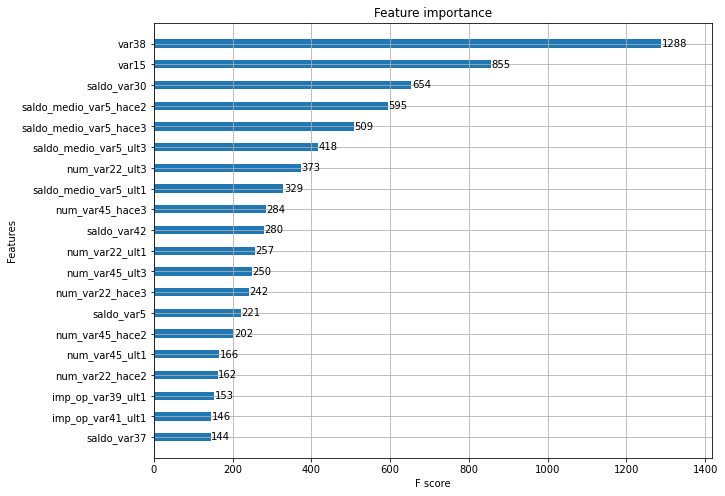

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

var15와 var38 피처가 XGBoost의 예측성능을 좌우하는 가장 중요한 피처이다.  


LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0: .4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128, 160],
          'min_child_samples':[60,100],
          'subsample':[0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0.881249	valid_0's binary_logloss: 0.121482	valid_1's auc: 0.838906	valid_1's binary_logloss: 0.139223
[41]	valid_0's auc: 0

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc: 0.889659	valid_0's binary_logloss: 0.11819	valid_1's auc: 0.837789	valid_1's binary_logloss: 0.139431
Early stopping, best iteration is:
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_loglos

[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc: 0.893185	valid_0's binary_logloss: 0.117392	valid_1's auc: 0.836384	valid_1's binary_logloss: 0.13992
[32]	valid_0's auc

[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_log

[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc

[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, best iteration is:
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_lo

[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0

[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0

[20]	valid_0's auc: 0.86305	valid_0's binary_logloss: 0.128312	valid_1's auc: 0.837702	valid_1's binary_logloss: 0.140094
[21]	valid_0's auc: 0.863758	valid_0's binary_logloss: 0.127907	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.139858
[22]	valid_0's auc: 0.864635	valid_0's binary_logloss: 0.127525	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139696
[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc

[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
Early stopping, best iteration is:
[31]	valid_0's auc: 0.87247	valid_0's binary_logloss: 0.124907	valid_1's auc: 0.838959	valid_1's binary_logl

[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 0.879478	valid_0's binary_logloss: 0.123507	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.13995
[22]	valid_0's auc: 0.880423	valid_0's binary_logloss: 0.123029	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.139912
[23]	valid_0's auc: 0.881684	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139762
[24]	valid_0's auc: 0.882873	valid_0's binary_logloss: 0.121986	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.139659
[25]	valid_0's auc: 0.883597	valid_0's binary_logloss: 0.121566	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.139623
[26]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.121104	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.139668
[27]	valid_0's auc

[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc: 0.895842	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836383	valid_1's binary_logloss: 0.140503
[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's auc: 0.897272	valid_0's binary_logloss: 0.114886	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140581
[46]	valid_0's auc: 0.898034	valid_0's binary_logloss: 0.114544	valid_1's auc: 0.835871	valid_1's binary_logloss: 0.140663
[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's a

[10]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.132096	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.143766
[11]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.131002	valid_1's auc: 0.837865	valid_1's binary_logloss: 0.143009
[12]	valid_0's auc: 0.868329	valid_0's binary_logloss: 0.130024	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.14244
[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 

[34]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118304	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.140165
[35]	valid_0's auc: 0.891448	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.837953	valid_1's binary_logloss: 0.140085
[36]	valid_0's auc: 0.892165	valid_0's binary_logloss: 0.11764	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.140112
[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc:

[12]	valid_0's auc: 0.856768	valid_0's binary_logloss: 0.132399	valid_1's auc: 0.839294	valid_1's binary_logloss: 0.143047
[13]	valid_0's auc: 0.85763	valid_0's binary_logloss: 0.13165	valid_1's auc: 0.838911	valid_1's binary_logloss: 0.142469
[14]	valid_0's auc: 0.859243	valid_0's binary_logloss: 0.130936	valid_1's auc: 0.838705	valid_1's binary_logloss: 0.141913
[15]	valid_0's auc: 0.860124	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.838608	valid_1's binary_logloss: 0.141547
[16]	valid_0's auc: 0.861358	valid_0's binary_logloss: 0.129687	valid_1's auc: 0.838422	valid_1's binary_logloss: 0.141134
[17]	valid_0's auc: 0.862159	valid_0's binary_logloss: 0.129139	valid_1's auc: 0.838636	valid_1's binary_logloss: 0.140786
[18]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.128664	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.140538
[19]	valid_0's auc: 0.863842	valid_0's binary_logloss: 0.128137	valid_1's auc: 0.838464	valid_1's binary_logloss: 0.140331
[20]	valid_0's auc

[13]	valid_0's auc: 0.85763	valid_0's binary_logloss: 0.13165	valid_1's auc: 0.838911	valid_1's binary_logloss: 0.142469
[14]	valid_0's auc: 0.859243	valid_0's binary_logloss: 0.130936	valid_1's auc: 0.838705	valid_1's binary_logloss: 0.141913
[15]	valid_0's auc: 0.860124	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.838608	valid_1's binary_logloss: 0.141547
[16]	valid_0's auc: 0.861358	valid_0's binary_logloss: 0.129687	valid_1's auc: 0.838422	valid_1's binary_logloss: 0.141134
[17]	valid_0's auc: 0.862159	valid_0's binary_logloss: 0.129139	valid_1's auc: 0.838636	valid_1's binary_logloss: 0.140786
[18]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.128664	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.140538
[19]	valid_0's auc: 0.863842	valid_0's binary_logloss: 0.128137	valid_1's auc: 0.838464	valid_1's binary_logloss: 0.140331
[20]	valid_0's auc: 0.864859	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.837832	valid_1's binary_logloss: 0.140179
[21]	valid_0's auc

[47]	valid_0's auc: 0.8853	valid_0's binary_logloss: 0.120089	valid_1's auc: 0.838624	valid_1's binary_logloss: 0.139193
[48]	valid_0's auc: 0.885876	valid_0's binary_logloss: 0.11993	valid_1's auc: 0.838569	valid_1's binary_logloss: 0.139212
[49]	valid_0's auc: 0.886141	valid_0's binary_logloss: 0.119757	valid_1's auc: 0.838345	valid_1's binary_logloss: 0.139288
[50]	valid_0's auc: 0.886433	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838342	valid_1's binary_logloss: 0.139332
[51]	valid_0's auc: 0.886975	valid_0's binary_logloss: 0.119377	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139331
[52]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.119161	valid_1's auc: 0.838204	valid_1's binary_logloss: 0.139331
[53]	valid_0's auc: 0.887867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.838044	valid_1's binary_logloss: 0.13936
[54]	valid_0's auc: 0.888093	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.838137	valid_1's binary_logloss: 0.13935
[55]	valid_0's auc: 0

[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.

[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, bes

[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0

[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 

[46]	valid_0's auc: 0.881216	valid_0's binary_logloss: 0.121594	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.139693
[47]	valid_0's auc: 0.881591	valid_0's binary_logloss: 0.121422	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139687
[48]	valid_0's auc: 0.881867	valid_0's binary_logloss: 0.121266	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.139682
[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc

[13]	valid_0's auc: 0.857206	valid_0's binary_logloss: 0.132038	valid_1's auc: 0.837364	valid_1's binary_logloss: 0.142245
[14]	valid_0's auc: 0.858161	valid_0's binary_logloss: 0.131391	valid_1's auc: 0.83777	valid_1's binary_logloss: 0.141759
[15]	valid_0's auc: 0.858975	valid_0's binary_logloss: 0.130772	valid_1's auc: 0.837831	valid_1's binary_logloss: 0.14139
[16]	valid_0's auc: 0.859623	valid_0's binary_logloss: 0.130219	valid_1's auc: 0.837953	valid_1's binary_logloss: 0.141016
[17]	valid_0's auc: 0.860576	valid_0's binary_logloss: 0.129684	valid_1's auc: 0.837985	valid_1's binary_logloss: 0.140713
[18]	valid_0's auc: 0.861311	valid_0's binary_logloss: 0.129202	valid_1's auc: 0.83796	valid_1's binary_logloss: 0.140452
[19]	valid_0's auc: 0.862347	valid_0's binary_logloss: 0.128715	valid_1's auc: 0.838506	valid_1's binary_logloss: 0.140189
[20]	valid_0's auc: 0.86305	valid_0's binary_logloss: 0.128312	valid_1's auc: 0.837702	valid_1's binary_logloss: 0.140094
[21]	valid_0's auc: 

[45]	valid_0's auc: 0.880907	valid_0's binary_logloss: 0.121777	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.139769
[46]	valid_0's auc: 0.881216	valid_0's binary_logloss: 0.121594	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.139693
[47]	valid_0's auc: 0.881591	valid_0's binary_logloss: 0.121422	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139687
[48]	valid_0's auc: 0.881867	valid_0's binary_logloss: 0.121266	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.139682
[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's au

[11]	valid_0's auc: 0.867454	valid_0's binary_logloss: 0.131002	valid_1's auc: 0.837865	valid_1's binary_logloss: 0.143009
[12]	valid_0's auc: 0.868329	valid_0's binary_logloss: 0.130024	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.14244
[13]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.129145	valid_1's auc: 0.837689	valid_1's binary_logloss: 0.141896
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[15]	valid_0's auc: 0.872273	valid_0's binary_logloss: 0.12745	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.141019
[16]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.12672	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140677
[17]	valid_0's auc: 0.874251	valid_0's binary_logloss: 0.126044	valid_1's auc: 0.83701	valid_1's binary_logloss: 0.140582
[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 

[34]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118304	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.140165
[35]	valid_0's auc: 0.891448	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.837953	valid_1's binary_logloss: 0.140085
[36]	valid_0's auc: 0.892165	valid_0's binary_logloss: 0.11764	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.140112
[37]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117321	valid_1's auc: 0.837291	valid_1's binary_logloss: 0.140221
[38]	valid_0's auc: 0.893318	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140221
[39]	valid_0's auc: 0.894018	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.83724	valid_1's binary_logloss: 0.140232
[40]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.116373	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140328
[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc:

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid

[27]	valid_0's auc: 0.884676	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.140086
[28]	valid_0's auc: 0.885524	valid_0's binary_logloss: 0.120598	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.140051
[29]	valid_0's auc: 0.886461	valid_0's binary_logloss: 0.120157	valid_1's auc: 0.837775	valid_1's binary_logloss: 0.140057
[30]	valid_0's auc: 0.887053	valid_0's binary_logloss: 0.119807	valid_1's auc: 0.837472	valid_1's binary_logloss: 0.140111
[31]	valid_0's auc: 0.888177	valid_0's binary_logloss: 0.119425	valid_1's auc: 0.837575	valid_1's binary_logloss: 0.140093
[32]	valid_0's auc: 0.889072	valid_0's binary_logloss: 0.119055	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.140195
[33]	valid_0's auc: 0.889782	valid_0's binary_logloss: 0.118676	valid_1's auc: 0.837296	valid_1's binary_logloss: 0.140221
[34]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118304	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.140165
[35]	valid_0's a

ROC AUC: 0.8417


In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1

LightGBM의 경우 테스트 데이터 세트에서 ROC AUC가 0.8442로 측정되었다